In [ ]:
import os

# os.chdir("../")
%load_ext autoreload
%autoreload 2

In [ ]:
os.getcwd()



In [ ]:
os.chdir("$araCNA_dir/")
os.makedirs('data/figures', exist_ok=True)


In [ ]:
os.getcwd()

## Input data egs

In [18]:
import pandas as pd

model_key = "6yjg8sp6" # doesn't matter for now
file_prefix = "raw_"
base_dir = "$data_dir/tcga_analysis/output/bams"
cases = [f for f in os.listdir(base_dir) if os.path.isdir(f"{base_dir}/{f}") if os.path.exists(f"{base_dir}/{f}/joined_results/{file_prefix}sequence_{model_key}.csv")]

case = '8a98a6e6-b763-4824-858b-fd2738e6c9a3'
joined_df = pd.read_csv(f"{base_dir}/{case}/joined_results/{file_prefix}sequence_{model_key}.csv", index_col=0)

In [19]:
joined_df = joined_df.reset_index()
joined_df["chr"] = joined_df["chr"].astype(int)
joined_df = joined_df.sort_values(["chr", "position"])

In [20]:
import torch


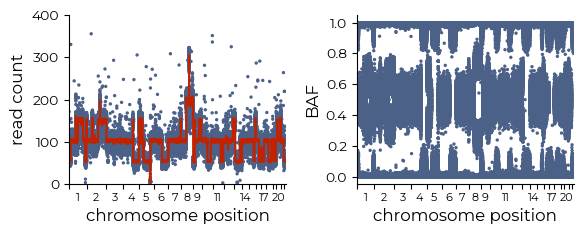

In [21]:
from notebook_analyses.plotting_functions import plot_inputs

plot_inputs(torch.tensor(joined_df[['read_depth', "BAF"]].values).unsqueeze(0), joined_df[["chr"]], window_size=100, read_ylim=400)

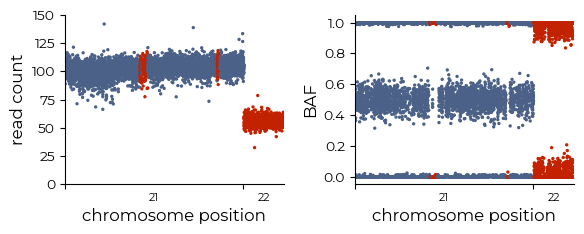

In [23]:
import numpy as np
import torch

from notebook_analyses.plotting_functions import plot_inputs

sub_df = joined_df.iloc[-12950:-5000].reset_index()

starts = [2779, 2877, 5580, 6550]
ends = [2852, 3063, 5680, 8000]

cs = np.ones_like(sub_df['minor_CN'].values)

for start, end in zip(starts, ends):
    cs[start-50:end-50] = 0

plot_inputs(torch.tensor(sub_df[['read_depth', "BAF"]].values).unsqueeze(0), sub_df[["chr"]], remove_some_labels=False, c= cs, read_ylim=150)


## Illustrate identifyability

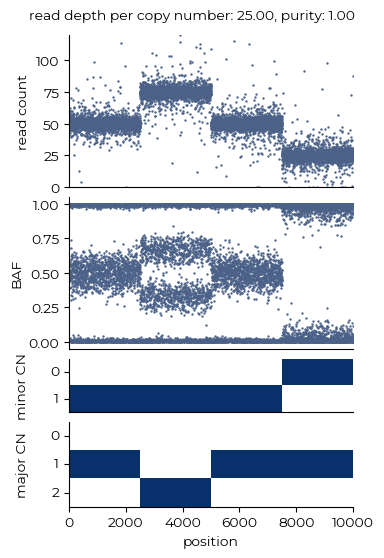

In [24]:
from functools import partial

import matplotlib.pyplot as plt
from aracna.src.datamodules.simulated.main_cna_sampling_func import (
    sample_cnas_from_input_ranges,
    sample_from_profile,
)

from notebook_analyses.plotting_functions import plot_data

profiles = [
        [[1, 2, 1, 1], [1, 1, 1, 0]],
        [[1, 2, 1, 2], [1, 1, 1, 0]],
        [[1, 2, 1, 2, 1], [1, 1, 1, 2, 1]],
        [[1, 3, 1, 2], [1, 0, 1, 2]],
    ]


def plot_w_title(
   inp, targets, read_depth, purity, figname, **kwargs
):
    plot_data(inp, targets, **kwargs)
    true_globs = {
        "read depth per copy number": read_depth,
        "purity": purity,
    }
    true_string = ", ".join([f"{k}: {v:.2f}" for k, v in true_globs.items()])

    plt.suptitle(f"{true_string}", fontsize=10, y=0.96)
    plt.tight_layout(h_pad=0.1)
    plt.savefig(f"data/figures/{figname}", dpi=300)


def get_data_from_profile(profile, purity=0.8, read_depth=15, seqlen=10000, rd_scale=0.1, baf_scale=0.05, sample_func=partial(sample_cnas_from_input_ranges, inject_homoz_loci=False)):
    rd_scale_range = [rd_scale, rd_scale]
    baf_scale_range = [baf_scale, baf_scale]
    return (*sample_from_profile(profile, seqlen, seqlen, read_depth, purity, rd_scale_range,baf_scale_range, sample_func=sample_func)[1:], read_depth, purity)




plot_w_title(*get_data_from_profile(profiles[0], purity = 1, read_depth=25), read_ylim=120, figsize=(4, 5.8), minor_adj=0.07, ratio_factor=0.28, figname="ill_eg_1.png")

In [26]:
import numpy as np

from notebook_analyses.plotting_functions import hex_to_rgba

cs = np.zeros((10000, 3))
cs[:2500] = hex_to_rgba("#9673A6")
cs[2500:5000] = hex_to_rgba("#D79B00")
cs[5000:7500] = hex_to_rgba("#9673A6")
cs[7500:] = hex_to_rgba("#82B366")

cs12 = np.zeros((12000, 3))
cs12[:2400] = hex_to_rgba("#9673A6")
cs12[2400:4800] = hex_to_rgba("#D79B00")
cs12[4800:7200] = hex_to_rgba("#9673A6")
cs12[7200:9600] = hex_to_rgba("#82B366")
cs12[9600:] = hex_to_rgba("#66FFFF")

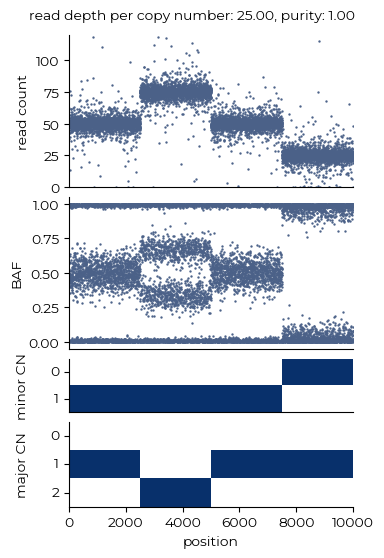

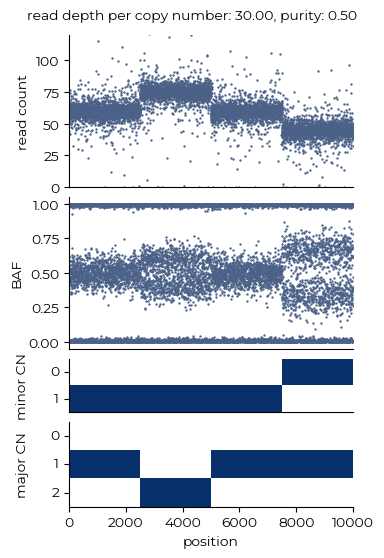

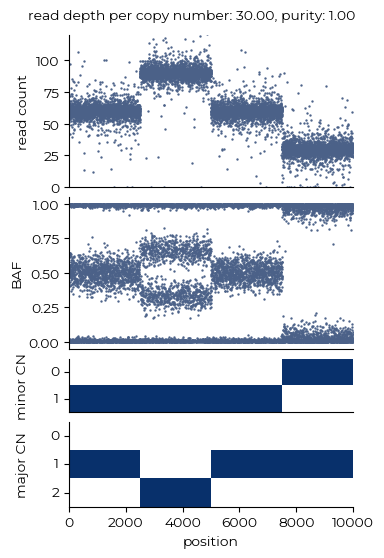

In [27]:
plot_w_title(*get_data_from_profile(profiles[0], purity = 1, read_depth=25), read_ylim=120, figsize=(4, 5.8), minor_adj=0.07, ratio_factor=0.28, figname="ill_eg_1.png")
plot_w_title(*get_data_from_profile(profiles[0], purity = 0.5, read_depth=30), read_ylim=120, figsize=(4, 5.8), minor_adj=0.07, ratio_factor=0.28, figname="ill_eg_2.png")
plot_w_title(*get_data_from_profile(profiles[0], purity = 1, read_depth=30), read_ylim=120, figsize=(4, 5.8), minor_adj=0.07, ratio_factor=0.28, figname="ill_eg_3.png")

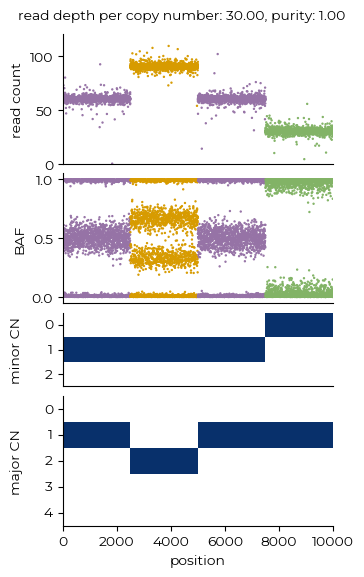

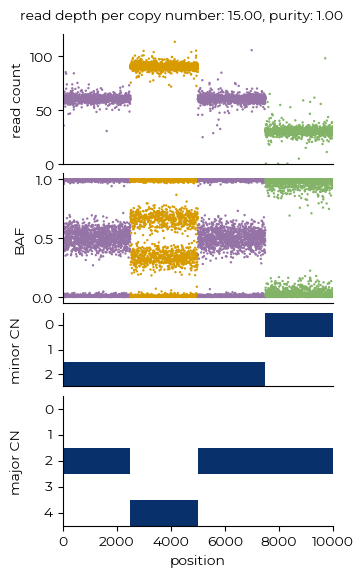

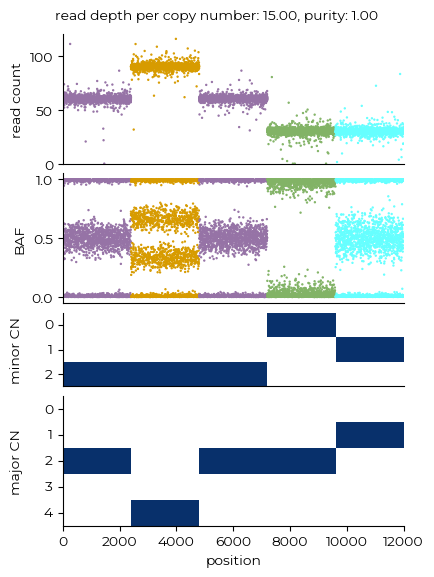

In [28]:
profile = [[1, 2, 1, 1], [1, 1, 1, 0]]
read_depth = 30
read_depth_scale_factor = 1
plot_w_title(*get_data_from_profile(profile, read_depth=read_depth, purity=1,  rd_scale=read_depth_scale_factor/read_depth), read_ylim=120, num_minor=2, num_major=4, minor_adj=0.07, figsize=(3.8, 6), figname="non_id_eg_1_1.png", color_arr=cs[:10000])
profile = [[2, 4, 2, 2], [2, 2, 2, 0]]
read_depth = read_depth/2
plot_w_title(*get_data_from_profile(profile, read_depth=read_depth, purity=1, rd_scale=read_depth_scale_factor/read_depth), read_ylim=120, minor_adj=0.07, figsize=(3.8, 6), figname="non_id_eg_1_2.png", color_arr=cs[:10000])
profile = [[2, 4, 2, 2, 1], [2, 2, 2, 0, 1]]
plot_w_title(*get_data_from_profile(profile, read_depth=read_depth, purity=1, rd_scale=read_depth_scale_factor/read_depth, seqlen=12000), read_ylim=120, minor_adj=0.07, figsize=(4.5, 6), figname="non_id_eg_1_3.png", color_arr=cs12)

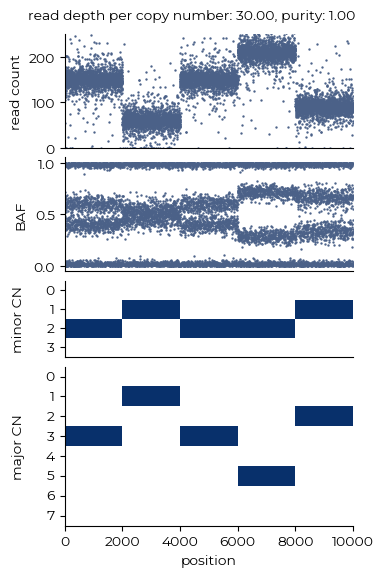

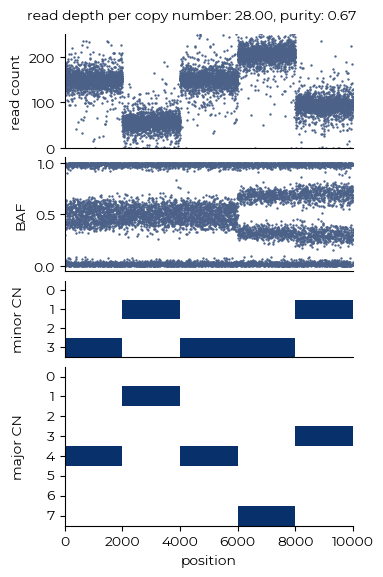

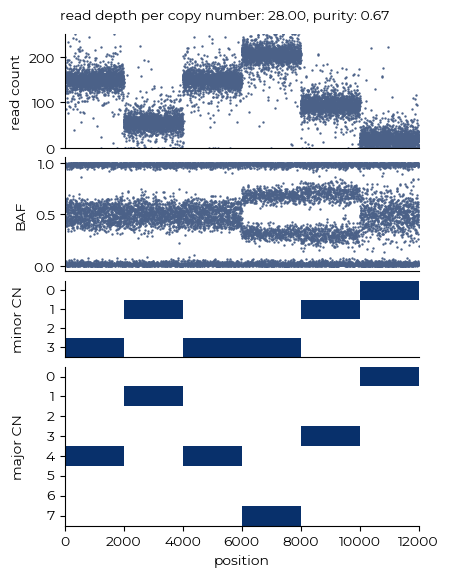

In [29]:
profile = [[3, 1, 3, 5, 2], [2, 1, 2, 2, 1]]
read_depth = 30
read_depth_scale_factor = 10
baf_scale = 0.1
plot_w_title(*get_data_from_profile(profile, read_depth=read_depth, purity=1, baf_scale = baf_scale, rd_scale=read_depth_scale_factor/read_depth), num_minor=3, num_major=7, read_ylim=250, figsize=(4, 6), ratio_factor=1/5, figname="non_id_eg_2_1.png")
profile = [[4, 1, 4, 7, 3], [3, 1, 3, 3, 1]]
read_depth = 28
# profile = [[4, 1, 4, 7, 3], [3, 1, 3, 2, 1]]
baf_scale = 0.11
plot_w_title(*get_data_from_profile(profile, read_depth=read_depth, purity=2/3, rd_scale=read_depth_scale_factor/read_depth, baf_scale=baf_scale), read_ylim=250, figsize=(4, 6), ratio_factor=1/5, figname="non_id_eg_2_2.png")
profile = [[4, 1, 4, 7, 3, 0], [3, 1, 3, 3, 1, 0]]
read_depth = 28
# profile = [[4, 1, 4, 7, 3], [3, 1, 3, 2, 1]]
baf_scale = 0.11
plot_w_title(*get_data_from_profile(profile, read_depth=read_depth, purity=2/3, rd_scale=read_depth_scale_factor/read_depth, baf_scale=baf_scale, seqlen=12000), read_ylim=250, figsize=(4.65, 6), ratio_factor=1/5, figname="non_id_eg_2_3.png")

In [ ]:
import torch
from aracna.src.datamodules.simulated.cna_sampler import PurelySimulated
from aracna.src.task_info.task_info import SeqInfo

task = SeqInfo(max_seq_length=100000)

read_depth = 15
purity = 1

read_depth_range = [read_depth, read_depth]
purity_range = [purity, purity]

read_depth_scale_range = [0.1, 0.1]
baf_scale_range = [0.05, 0.05]
sampler = PurelySimulated(task, read_depth_range, read_depth_scale_range, baf_scale_range, purity_range, max_total=8)

inp, targets = sampler.sample('infer')[1:3]
plot_data(torch.tensor(inp).T.unsqueeze(0), torch.tensor(targets).T.unsqueeze(0))


In [ ]:
import numpy as np
from aracna.src.datamodules.simulated.cna_sampler import sample_cnas_from_parental


def get_data_from_targets(targets, read_depth=15, purity=0.8, read_depth_scale=0.1, baf_scale=0.05):
    inp = sample_cnas_from_parental(np.array(targets).T, read_depth=read_depth, read_depth_scale=read_depth_scale, baf_scale=baf_scale, purity=purity)[0:2]
    return torch.tensor(inp).T.unsqueeze(0), torch.tensor(targets).T.unsqueeze(0)


plot_data(*get_data_from_targets(targets, purity=0.5, read_depth_scale=0.32))

In [8]:
import os
os.getcwd()

'/Users/evisscher/repos/araCNA_test'

In [12]:
import torch


torch.load(f'aracna/araCNA-models/pjflljt4/checkpoints/last.ckpt')

/var/folders/zx/pkl7lxms2zb4jy5mtdpqbphw0000gr/T/ipykernel_17367/3213519655.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f'aracna/araCNA-models/pjflljt4/ch

{'state_dict': OrderedDict([('model.embeddings.value_embeddings.0.weight',
               tensor([[-1.2791e-03,  2.1260e-02],
                       [-2.0371e-02, -1.8869e-02],
                       [-6.2639e-04,  2.3153e-02],
                       [-6.9466e-01,  2.8202e-01],
                       [-4.3873e-02, -2.7539e-02],
                       [-2.8018e-02,  1.7783e-01],
                       [-3.3756e-05, -9.9156e-01],
                       [-1.7392e-02,  3.7525e-02],
                       [-9.6008e-05, -4.3469e-02],
                       [-6.5763e-03,  1.4456e-02],
                       [ 2.7292e-02, -7.4723e-02],
                       [-4.0153e-02,  1.2523e-03],
                       [-6.3031e-05,  8.8744e-01],
                       [-1.0474e-01,  2.4310e-01],
                       [-9.1249e-03, -5.0028e-02],
                       [-3.5239e-05,  4.2993e-02]])),
              ('model.embeddings.value_embeddings.0.bias',
               tensor([-0.0394,  0.0000, -0.039